# Notebook Introduction

'''
## Get started
Please, use a different browser in case you are using *MS Internet Explorer* or *MS Edge* and you experience **mulfunctions**. 

To **run** or **work** on this [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) you **must** 

1. **Save the notebook** to your Google Drive. After saving the notebook, you will be able to run it.

  * Select **File** / **Save a copy in Drive**  from the Colab menu (an example is below, the notebook name may change)
     ![Colab Menu](https://drive.google.com/uc?export=download&id=1-WfIFWuHC6OSJb3iwnR7NqpkXs9tvwO2)
  * If required, login with your google account  
  ![Signin Button](https://drive.google.com/uc?export=download&id=1yomWF3t03TiPsrp6AAZDXIFpz5XXTvM1)  (any goole account is fine, you can use the campus account or your own gmail account)
  

2.  Files are usually saved in the  **Colaboratory** *directory* which is located on the root of your google drive. 

3. To open the notebook again:
    * login to the google drive you saved the notebook: [drive.google.com](http://drive.google.com/)
    * open the **Colaboratory** directory
    * **right click** on the file. From the drop down menu choose **Open With** / **Google Colaboratory**

4. In case of problems, please refer to [this document](https://docs.google.com/document/d/1Y-ABvbOQhMvi7COibLJopL-mnPsaCBv_KRr6eKAsnj8/edit?usp=sharing)

5. By saving the first colab notebook in gdrive, it is automatically installed a **software extension** which is required to open or create new notebooks in your gdrive

## Notebooks

This is a [jupyter notebook](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html) interface where several elements can be mixed e.g., 

* Cells containing programs (we will focus on the python programming language),
* Inputs and outputs of the computations,
* Explanatory text, 
* Mathematics, 
* Images,
* Rich media representations of objects
* ...

## Cell Types
We will mostly focus on two cell types:

* Code
* Text 

## Markdown
Contents in **texts cells** can be written using [markdonw syntax](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html). 

Here it is a quick reference to the markdown syntax: 

[https://en.support.wordpress.com/markdown-quick-reference/](https://en.support.wordpress.com/markdown-quick-reference/) 


## Creating an empty Colab
Please follows the next steps

* Open in a browser the URL [https://drive.google.com/](https://drive.google.com/) 

* Please choose

+ New / More / Colaboratory

* Save the notebook in your preferred gdrive location  


### COLAB Keyboard Shortcuts
To access the COLAB keyboard shortcuts:

[Menu] Tools / Keyboard Shortcuts (ctrl to be replaced by Command in the Mac)

* Ctrl+M  M     To change a cell into text
* Ctrl+M  Y      To change a cell into code
* Ctrl+M L       Toggle line numbers

'''

# Logistic Regression Classifier (Logit) Recap

Application Scenario: Sentiment Analysis on Tweets (i.e., Twitter messages)

Let's analyse some Twitter messages on the topic **XYZ**
*    $(d_1)$ XYZ is good
*    $(d_2)$ I like XYZ
*    $(d_3)$ I dislike XYZ
*    $(d_4)$ XYZ is awful

We are classifying the Tweets into the following categories

*    $S_p$ *Positive Sentiment* 
*    $S_n$ *Negative Sentiment*

For the sake of simplicity 
* We classify on 2 classes
* i.e., no  neutral sentiment

Terminology disclaimer: from now on **Tweets** will be referred as **Documents**

How would you address this problem?
<br>
<br>
<br>
<br>

Possible solution: Dictionary Based Classification

* Dictionary approach. I can identify a set of positive words (i.e., words related to positive sentiment)  and a set of negative ones (i.e., words related to a negative sentiment)

  * $dictionary_p$ = {good, like, ...}

  * $dictionary_n$ = {awful, dislike, ...}

* Intuition: I can select the sentiment based on the words occurrences. The sentiment is chosen according to the most used word set in a message
* Next steps: to turn the classification problem into a mathematical one

## A Feature Engineering Example: the Document-Term Matrix

* The Document-Term Matrix (DTM) represents the content of a set of documents using numbers 
* Every row represents a (single) document
* Every column is related to a word of the lexicon 
  * Lexicon is also known as vocabulary
  * Lexicon/vocabulary: the set of all words (no repetition)
* For the sake of simplicity, now we consider only single words (uni-grams)
  * The same approach can be extended by counting the occurences of Bi-grams, Tri-grams, ..., and n-grams in general
  * n-gram: a set of *n* consecutive words
  
Let's suppose we have *m* documents and *n* words in the vocabulary/lexicon

Document Term Matrix:

|   | $term_1$ | $term_2$ &nbsp; &nbsp; &nbsp;| ... | $term_n$ |
|---|---|---|---|---|
| $d_1$|.|.|.|.|
| $d_2$|.| $e_{j,i}$ |.|.|
| $...$|.|.|.|.|
| $d_m$|.|.|.|.|

* Every matrix element $e_{j,i}$ is a weight related to the  term $t_i$ in the document $d_j$. 
* In this case the weight is the **Term Frequency** i.e., the number of occurrences of the term $t_i$ in the document $d_j$

  

* The Document Term Matrix is inspired by the **Bag of Word approach** (BoW)

* The BoW focuses on word requency counts, information about word position is lost 
* The next two sentences ... 

>> $(d_1)$    **the dog bites Mario** 

>> $(d_2$)    **Mario bites the dog**

* ... share the same representation using the BoW approach

| |the|dog|bites|Mario|
|---|---|---|---|---|
| $d_1$ | 1 | 1 | 1 | 1 |
| $d_2$ | 1 | 1 | 1 | 1 |



## Turning the Sentiment Analysis problem into Maths

Let's come back to the classification problem

Given the document term matrix X 

$X = ...$

| | XYZ |  is |  good |  I |  like |  dislike |  awful |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| ($d_1$) XYZ is good |  1  |  1  |  1  |  0  |  0  |  0  |  0 |
| ($d_2$) I like XYZ  |   1  |  0  |  0  |  1  |  1  |  0  |  0 | 
| ($d_3$) I dislike XYZ | 1  |  0  |  0  |  1  |  0  |  1  |  0 | 
| ($d_4$) XYZ is awful  | 1  |  1  |  0  |  0  |  0  |  0  |  1 | 

The first column contains the document and it is not actually part of the DTM, stricltly speaking.

Let's recall the positive and negative word dictionaries

* $dictionary_p$ = {good, like, ...}

* $dictionary_n$ = {awful, dislike, ...}

and let's turn them into a weight vector $\theta$ where 
* $+1$ is given to each term in dictionary$_{p}$, 
* $-1$ to each term in dictionary$_{n}$, and 
* $0$ to the remaining terms 

$\theta=...$

| | XYZ |  is |  good |  I |  like |  dislike |  awful |
|:---|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
| $dictionary_p$ |  0  |  0  |  1  |  0  |  1  |  -1  |  -1 |



The Sentiment for each document can be computed as follows:

\begin{align}
S = X \cdot \theta_T =
\begin{bmatrix}
1 & 1 & 1 & 0 & 0 & 0 & 0 \\ 
1 & 0 & 0 & 1 & 1 & 0 & 0 \\ 
1 & 0 & 0 & 1 & 0 & 1 & 0 \\ 
1 & 1 & 0 & 0 & 0 & 0 & 1 \\ 
\end{bmatrix}       
\cdot
\begin{bmatrix}
 0 \\ 0 \\ +1 \\ 0 \\ +1 \\ -1 \\ -1 \\
\end{bmatrix}  = 
\begin{bmatrix}
1 \\
1 \\
-1 \\ 
-1 \\
\end{bmatrix} 
\begin{matrix}
(d_1) \\
(d_2) \\
(d_3) \\ 
(d_4) \\
\end{matrix}             
\end{align}

The original documents:

| Text |
|:---|
| ($d_1$) XYZ is good |  
| ($d_2$) I like XYZ  |  
| ($d_3$) I dislike XYZ |
| ($d_4$) XYZ is awful  | 

## Some Terminology, Matrices, and Numbers

**Document Term Matrix**: $X = [nd\,\times\,t ]$ 
* nd: Number of documents
* t: Number of terms

**Document Vector**: $d_j = [x_{j,1}, \; x_{j,2}, \; ..., \; x_{j,t}]$
*  $d_j$ is the $j^{th}$ row in the Document Term Matrix $X$

$s_j$ is the *decision value* for the document $j$ and the following relationship holds

\begin{align}
s_j = d_j \cdot \theta_T =  \theta_1 \cdot x_{j,1} + \theta_2 \cdot  x_{j,2} +  ... + \theta_t \cdot x_{j,t} 
\end{align}

To make the equation more general, we add a **Bias** (also known as constant term): 
     
\begin{align}
s_j = \mathbf{\theta_0} + d_j \cdot \theta_T = \mathbf{\theta_0} +  \theta_1 \cdot x_{j,1} + \theta_2 \cdot x_{j,2} +  ... + \theta_t \cdot x_{j,t} ...
\end{align} 
    
and we rewrite:

\begin{align}
s_j = h_\theta(d_j) = \theta_0 + \theta_1 \cdot x_{j,1} + \theta_2 \cdot x_{j,2} +  ... + \theta_t \cdot x_{j,t}
\end{align}

$h_\theta(d_j) $ is the **decision function**

* $h_\theta(\cdot) $ is evaluated on the several rows $d_j$ of $X$ 
* For each $d_j$, the function $h_\theta(d_j)$ returns a value $s_j$ that can be used to classify the document $d_j$ **sentiment** 

\begin{align}
        \text{sentiment}(d_j) = \left\{
        \begin{array}{cl}
        1\,(Positive) & h_\theta(d_j)  \ge 0 \\
        0\,(Negative) & h_\theta(d_j)  < 0
        \end{array}
        \right.
    \end{align}

---

Given a document $d_j$ (i.e., a row in the document term matrix)  let's assume we have still to classify it into one of two sets: positive and negative (Logit is a binary classifier).


Let's introduce a decision function like the following:  

\begin{align}
f(d_j) = g(h_\theta(d_j))
\end{align}
where 


* $h_\theta() = ... $ it is like the one we have seen so far
* $g()=\frac{1}{1+e^{-x}}$ **sigmoid  function**

![Sigmoid](https://drive.google.com/uc?export=download&id=12tBmgN0wweBBRxyQcCaylqylVltGX1Vs)

and the sentiment can be computed as follows

\begin{align}
\text{sentiment}(d_j) = \left\{
\begin{array}{cl}
1\,(Positive) & f(d_j)  \ge 0.5\\
0\,(Negative) & f(d_j)   < 0.5
\end{array}
\right.
\end{align}

      


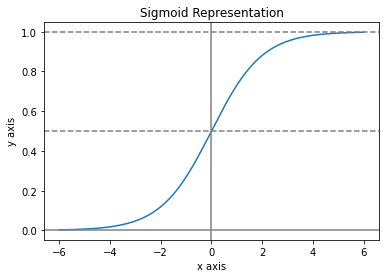

In [ ]:
# Code to draw the Sigmoid function
import matplotlib.pyplot as plt
import numpy as np

def showSigmoid():
  sigmoid = lambda x: 1 / (1 + np.exp(-x)) # lambda defines a custom function # np refers to the numpy library
  xLi = np.linspace(-6.0, 6.0, 1200) # start, stop, n. of points
  yLi=[sigmoid(x) for x in xLi]
  plt.plot(xLi, yLi, label="Sigmoid")
  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title("Sigmoid Representation")
  #plt.legend() # Creates a legend
  #plt.box(False) # remove the external black frame
  plt.axhline(0, color='gray') # x axis
  plt.axvline(0, color='gray') # y axis
  plt.axhline(0.5, color='gray', ls='--' )  # ls is line style
  plt.axhline(1, color='gray', ls='--' )  # ls is line style
  
  #plt.savefig('sigmoid.png') # uncomment to save on disk. Also call this method before plt.show() to obtain a high quality figure
  plt.show()

showSigmoid()

## Ground-Truth

* $y_j^{Pred} = f(d_j) = g(h_\theta(d_j))$ 
* $y_j^{Pred} \in [0,1] $ 

NB: 
* $y_j^{Pred}$ is the decision function prediction
* $y_j^{True} \in \{0,1\}$ is the **True** value to be predicted, it is also called: **gold**, **ground-truth**

| Document | $y_j^{Pred}$ | $y_j^{True}$ | Note |
|---|---|---|:---|
1 | 0.1 | 0 | OK |
2 | 0.9 | 1 | OK |
3 | 0.7 | 0 | Wrong |
4 | 0.47 | 0 | OK, Nevertheless, $y^{Pred}_j$ is too close to the border $0.5$ }|




## Logistic Regression Classifier - Cost Function 

Cost function for a single document

\begin{align}
Cost(y^{Pred}_j, y_j^{True}) =  
  \begin{cases}
     -ln(y^{Pred}_j) & \text{if } y_j^{True} = 1  \text{ (Pos. Sent.)} \\ 
     -ln(1-y^{Pred}_j) & \text{if } y_j^{True} = 0  \text{ (Neg. Sent.)}   
  \end{cases}
\end{align}

![Cost Function](https://drive.google.com/uc?export=download&id=12wZzVoJz1vWC3vS_P0cz1qbXKM6CS3JJ)

| $j$  | $y_j^{Pred}$ | $y_j^{True}$ | $Cost(y_j^{True}, y_j^{True})$   |
|---|---|---|---|   
| 5 | 0.1 | 0 |  0.105 |
| 6 | 0.8 | 1 | 0.223 |
| 7 | 0.6 | 0 |  0.916|
| 8 | 0.3 | 0 |  0.357 |

Summary: $Cost \approx 0$ in case of success (similarity between $y_j^{True}$ and $y_j^{Pred}$), else $Cost >> 0$ 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


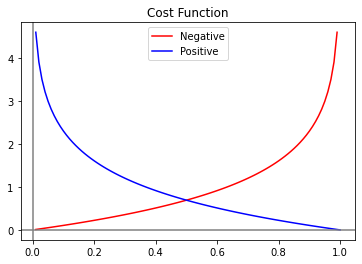

In [ ]:
# Making the Cost Function Chart
import matplotlib.pyplot as plt
import numpy as np

def showCostFunction():
  xLi = np.linspace(0.01, 1.0, 100) # start, stop, n. of points
  yPos= -np.log(xLi)  # Positive Cost Function
  yNeg= -np.log(1-xLi) # Negative Cost Function
  plt.plot(xLi, yNeg, label="Negative", color='Red')
  plt.plot(xLi, yPos, label="Positive", color='blue')
  plt.title("Cost Function")
  plt.legend()
  #plt.box(False) # remove the external black frame
  plt.axhline(0, color='gray') # x axis
  plt.axvline(0, color='gray') # y axis
  #plt.savefig('cost_function.png') # uncomment to save the Fig
  plt.show()

showCostFunction()

## Cost Function Minimization

Problem recap

Given 
* a Document Term Matrix: $X = [ nd \times t]$ i.e., 
$X = $ $[$ (n. of docs) $\times$ (n. of terms)$]$
* the decision function $g(h_{\theta})$ parametric on $\theta$ 

We aim to identify the $\theta$ element values that minimize the overall cost function $ocf(\theta)$: 

Goal: 

\begin{align}
\displaystyle{\min_{\theta}  ocf(\theta)}
\end{align}

where 

\begin{align}
\displaystyle{ocf(\theta) =  \frac{1}{nd} \sum_{j=1}^{nd} Cost(g(h_{\theta} (d_j))}
\end{align}

A numerical computation technique called Gradient Descent is used

## Gradient Descent

Credits: [Gradient Descent in Python](https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1#:~:text=What%20is%20gradient%20descent%20%3F,reach%20the%20local%2Fglobal%20minima.)

Goal: to Find the local minima of the function $y=(x+5)^2$

Let's plot the function


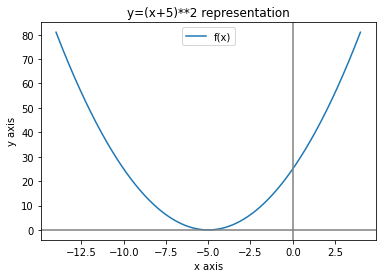

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
f = lambda x: (x+5)**2# **2: the power of 2 # f=(x+5)**2
#xLi = [x/100.0 for x in range(-1400,400)]
xLi = np.linspace(-14, 4.0, 1800) # start, stop, n. of points
yLi=[f(x) for x in xLi]
plt.plot(xLi, yLi, label="f(x)")
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.title("y=(x+5)**2 representation")
plt.legend()
#plt.box(False) # remove the external black frame
plt.axhline(0, color='gray') 
plt.axvline(0, color='gray')
plt.show()

Let's start from the point x=3

Solution : We know that $y = (x+5)^2$ reaches it's minimum value when x=-5 just by looking at the graph (i.e when x=-5, y=0) or solving it analitically. Hence, x=-5 is the local and global minima of the function. 

Now, let’s see how to obtain the same result numerically using gradient descent.

* Step 1: Identify the the derivative of the function i.e., $\frac{\partial y}{\partial x} = \frac{\partial f(x)}{\partial x} = 2 \cdot (x+5)$. We will call **slope** the result of computing the derivative in a specific point i.e., 
\begin{align}
slope(x) = \frac{\partial f(x)}{\partial x}
\end{align}


* Step 2: Start the minima search from a random point e.g., 

\begin{align}
x=3
\end{align}

* Step 3: Let's perform a step towards the minima. Let's call $x_{new}$ the new point closer to the minima. We can compute $x_{new}$ as follows ...  
\begin{align}
 x_{new} = x - \delta = x - slope(x) \cdot learning\_rate
\end{align}

  * What about the - sign? More on an upcoming example

  * How much to move? How wide is the step? 
\begin{align}  
  \delta = slope(x) \cdot learning\_rate
\end{align}
\begin{align}  
  learning\_rate \in [0, 1]
\end{align}
... whereas the $learning\_rate$ is a parameter of the algorithm (i.e., the user chooses it)

* repeat step 3 untill a stop criteria is met. Several stop criteria can be used
  * Perform the iteration a fixed amount of times (simple but very inefficient)
  * Stop when $| x_n - x_{n-1} | < threshold$ e.g., $threshold=0.0000001$ ...
  * ... Rationale: when the minimum improves too little, we are close or we are already on it

Some examples

* Gradient Descent 1st step
![Gradient Descent 1st Step](https://drive.google.com/uc?export=download&id=12wuOWxE7GR9UK8rP73_hyOjcd_KhFOT1)

Why the $-\delta$ in ...?
\begin{align} 
x_{new} = x - \delta = x - slope(x) \cdot learning\_rate
\end{align}

Answer: let's compute 
\begin{align}
f'(x) = 2 \cdot (x + 5) 
\end{align}

for $x=3$    $\;\;\;$ i.e.,     

\begin{align}
f'(3)=16
\end{align}

The $-\delta$ makes $x_{new}$ to be left from the starting point

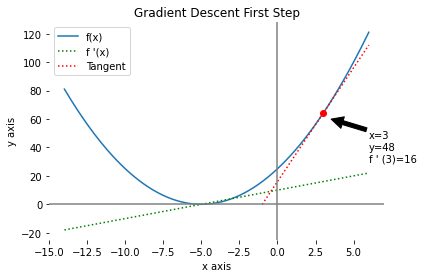

In [ ]:
# Showing Gradient Descent 1st Step

import matplotlib.pyplot as plt
import numpy as np
def gd1stStep():
  f = lambda x: (x+5)**2# **2: the power of 2
  xLi = np.linspace(-14.0, 6.0, 200) # start, stop, n. of points
  #yLi=[f(x) for x in xLi]
  yLi=f(xLi)
  plt.plot(xLi, yLi, label="f(x)")
  plt.plot(xLi, [2*(x+5) for x in xLi], color='green', linestyle=':', label="f '(x)") # The derivative
  plt.plot([-1, 6], [0,112], color='red', linestyle=':', label="Tangent") # The tangent
  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title("Gradient Descent First Step")
  plt.legend()
  plt.box(False) # remove the external black frame
  plt.axhline(0, color='gray') # y axis
  plt.axvline(0, color='gray') # x axis
  #plt.annotate("text", xy=(3,64), xytest=(3,20) )
  plt.plot(3, 64, "or", color='red') # intersection point
  plt.annotate( # arrow and annotation
      "x=3\ny=48\nf ' (3)=16", 
      xy=(3.5, 60), 
      xytext=(6, 30),
      arrowprops=dict(facecolor='black', shrink=0.01)
  )

  #plt.savefig('grad_desc_1st_step.png') # uncomment to save the fig
  plt.show()
  
gd1stStep()

Trying several learning rate

Number of iterations performed:  20


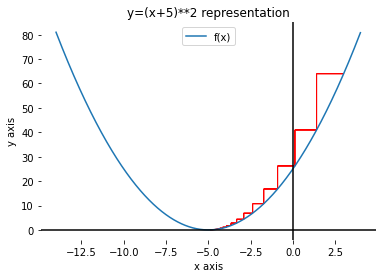

In [ ]:
# Plotting all the Steps of a Gradient Descent. learningRate=0.1 

import matplotlib.pyplot as plt
import numpy as np

def gdf(
    f = lambda x: (x+5)**2 ,# the function to minimize 
    fprime = lambda x: 2*(x+5) ,# the derivative
    xStart = 3 ,# starting x value
    threshold = 0.000001 ,# the threshold
    learningRate=0.1 # the learning rate
    # try 0.1, 0.4, 0.5, 0.8, 0.9 # learning rate should be in [0,1]
  ):

  x=xStart
  xPrevious = -1000000 # an impossible value is chosen for the first time 

  maxIterations=20
  i=0
  stepsLi=[]
  while abs(x-xPrevious) > threshold and i<maxIterations: # and abs(x)<50:
        
    slope = fprime(x)
    #print('x', x, 'slope', slope)
    stepsLi.append( (x, slope) ) # appending the slope for later computation
    
    xNew = x - slope*learningRate # computing xNew

    xPrevious=x # actual x becomes the previous one for the next loop
    x=xNew # new x becomes the actual one for the next loop
    i=i+1
    #print( 'abs(x-xPrevious)', abs(x-xPrevious) , 'x', x, 'xPrevious', xPrevious, 'f(x)', f(x), 'f(xPrevious)', f(xPrevious) )

  #print(stepsLi)
  print('Number of iterations performed: ', len(stepsLi))

  plt.clf() # clear figure

  for ii in range(1, len(stepsLi)):
    x=stepsLi[ii][0]
    xPrev=stepsLi[ii - 1][0]
    #plt.arrow(xPrev, f(xPrev), x-xPrev, f(x)-f(xPrev) ) # , head_width=0.5
    plt.arrow(xPrev, f(xPrev), x-xPrev, 0 , color='red') # horizontal
    plt.arrow(x, f(xPrev), 0, f(x)-f(xPrev), color='red' ) # vertical

  xLi = [x/100.0 for x in range(-1400,400)]
  yLi=[f(x) for x in xLi]
  plt.plot(xLi, yLi, label="f(x)")

  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.title("y=(x+5)**2 representation")
  plt.legend()
  plt.box(False) # remove the external black frame
  plt.axhline(0, color='black') 
  plt.axvline(0, color='black')

  plt.autoscale()

  plt.show()

gdf(learningRate=0.1 )

Number of iterations performed:  18


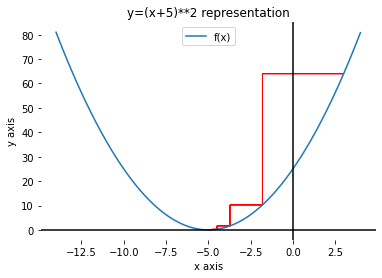

In [ ]:
# Let's try with a different learning rage
gdf(learningRate=0.3)

Number of iterations performed:  20


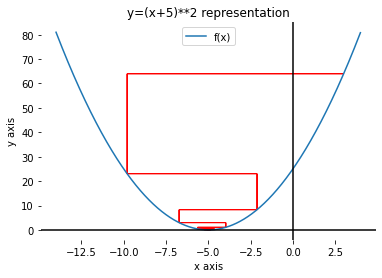

In [ ]:
# As a result, less steps are required
# Let's try a bigger Learning Rate
gdf(learningRate=0.8)

## Gradient Descent for several Variables Function

Given a function 
\begin{align}
y=f(x_1, x_2, ..., x_n)
\end{align}

whereas

\begin{align}
f: \mathcal{R}^n \rightarrow \mathcal{R}
\end{align}

For the sake of simplicity, we introduce the point *p*

\begin{align}
p=(x_1, x_2, ..., x_n)
\end{align}

and we can rewrite

\begin{align}
y=f(x_1, x_2, ..., x_n)=f(p)
\end{align}


The gradient is:

\begin{align}
\nabla f(p) = \begin{bmatrix} 
\frac{\partial f(p)}{\partial x_1} \\ 
\\
\frac{\partial f(p)}{\partial x_2} \\ 
\\
... \\
\\
\frac{\partial f(p)}{\partial x_n} \\ 
\end{bmatrix}
\end{align}


We can still use gradient descent to find a minima for the function $f(x_1, x_2, x_n)$. The $p_{new}$ is computed as follows
  
\begin{align}
 p_{new} = p - \nabla f(p) \cdot learning\_rate
\end{align}

The other steps are unchanged.


## Gradient Descent Example 3d



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: UserWarning: The following kwargs were not used by contour: 'color'


current.shape (2,)
grad.shape (2,)


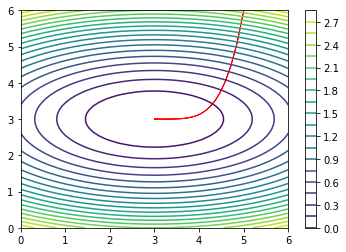

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d # 3d plot in colab

a=4.0
b=2.0
c=1.0

def f(x, y):
  return c*( ((x-3)/a)**2 + ((y-3)/b)**2 ) # This is an elliptic paraboloid

def deFdeX(x,y):
  # deF/deX = c*(2*(x-3)/a**2 + 0) = 2*c*(x-3)/a**2
  return  2*c*(x-3)/(a**2)

def deFdeY(x,y):
  # deF/deX = c*(0 + 2*(y-3)/b**2) = 2*c*(y-3)/b**2
  return  2*c*(y-3)/(b**2)

def grad_f(x,y):
  return np.array([
      deFdeX(x,y),
      deFdeY(x,y)
  ])
  

def newYorkDistance(p1, p2):
  """Also called Taxy Cab Distance. 
     It is the sum of the absolute differences of 
     two points Cartesian coordinates."""
  return abs(p1[0]-p2[0]) + abs(p1[1]-p2[1])

def plotGD3d():
  x = np.linspace(0, 6, 60)
  y = np.linspace(0, 6, 60)
  X, Y = np.meshgrid(x, y) # computing a mesh of (x_i, y_i) values.
  #print(X.shape, type(X)) # (60, 60) <class 'numpy.ndarray'>, ...
  #print(Y.shape, type(Y)) # (60, 60) <class 'numpy.ndarray'>
  #print(X) # [[0. 0.10169492 0.20338983 ... 6.] [0. 0.10169492 0.20338983 ... 6.] ... ]
  #print(Y) # [[0. 0. ... 0.] [0.10169492 0.10169492 ... 0.10169492] ... ]      
  Z = f(X, Y)

  # Introducing the contour plot
  # 3d figures are projected in 2d, using isometric curves
  plt.contour(
      X, Y, Z, 
      20, # levels, determines the number and positions of the contour lines / regions 
      color='black'); # A countour plot is created
  plt.colorbar()


  threshold = 0.000001
  start = np.array([5, 6]) # respectively x and y 
  learningRate=0.6 # try 0.1, 0.4, 0.5, 0.8, 0.9 # learning rate should be in [0,1]

  previous = start - 1000 # performed on both x and y, i.e., previous[0] and previous[1]
  current = start
  maxIterations=100
  i=0

  grad = grad_f(current[0], current[1])
  print('current.shape', current.shape)
  print('grad.shape', grad.shape)  
  while newYorkDistance(current, previous) > threshold and i<maxIterations:
    grad = grad_f(current[0], current[1])

    next = current - grad*learningRate
    # Drawing the arrow. Params: x, y, dx, dy
    plt.arrow(current[0], current[1], next[0]-current[0], next[1]-current[1], color='red' ) 
    #print(current[0], current[1], next[0], next[1]) 

    previous = current
    current = next

    i+=1

  plt.show()

plotGD3d()

current.shape (2,)
grad.shape (2,)


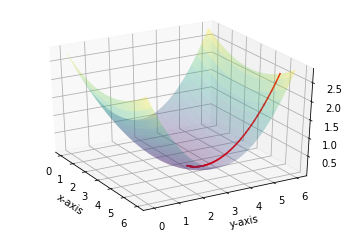

In [ ]:
# Trying another 3d view
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



x = np.linspace(0, 6, 60)
y = np.linspace(0, 6, 60)
X, Y = np.meshgrid(x, y) # computing a mesh of (x_i, y_i) values.
Z = f(X, Y)

threshold = 0.000001

ax = plt.axes(projection='3d')
#fig = plt.figure() ; #plt.show()
#ax = Axes3D(fig)

ax.plot_surface(X, Y, Z, 
                #rstride=10, cstride=10, # downsampling stride in each direction
                cmap='viridis', # color map
                edgecolor='none',
                alpha=0.3
                );
          
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

ax.view_init(elev=30, azim=-30) # define the main viewpoint angle


# Starting point
start = np.array([5, 6]) # respectively x and y 

learningRate=0.1

# The next commands works on both x and y e.g., previous[0] and previous[1]
previous = start - 1000 # creating a fake previous
current = start
maxIterations=100
i=0

grad = grad_f(current[0], current[1])
print('current.shape', current.shape)
print('grad.shape', grad.shape)  
while newYorkDistance(current, previous) > threshold and i<maxIterations:
  grad = grad_f(current[0], current[1])

  next = current - grad*learningRate

  
  #plt.arrow(current[0], current[1], next[0]-current[0], next[1]-current[1], color='red' ) # Drawing the arrow. Params: x, y, dx, dy
  #print(current[0], current[1], next[0], next[1]) 

  previous = current
  current = next

  zPrevious = f(previous[0], previous[1])
  zCurrent = f(current[0], current[1])

  ax.plot([previous[0], current[0]], [previous[1], current[1]], [zPrevious, zCurrent], color='red') # [xStart, xEnd], [yStart, yEnd], [zStart, zEnd]

  i+=1

The next discussion will focus on Logistic Regression.

## Cost Function Minimization

Problem recap

Given 
* an imput matrix X e.g., a *Document Term Matrix* $X = [ nd \times t]$ i.e., 
$X = $ $[$ (n. of docs) $\times$ (n. of terms)$]$
* the decision function $g(h_{\theta})$ parametric on $\theta$ 

Goal: 

We aim to identify the $\theta$ element values that minimize the *overall cost function* $ocf(\theta)$ i.e.,  
\begin{align}
\displaystyle{\min_{\theta}  ocf(\theta)}
\end{align}

where 

* 
$\displaystyle{ocf(\theta) =  \frac{1}{nd} \sum_{j=1}^{nd} Cost(g(h_{\theta} (d_j))}$

*  $\theta = [\theta_0, \theta_1, \theta_2, \;...,\;  \theta_t]$

*  $h_\theta(d_j) = \theta_0 + \theta_1 x_{j,1}, \theta_2 x_{j,2} + \; ... \; + \theta_t x_{j,t}  $

* $g()$ is the Sigmoid


Question: can a linear model effectively separate the positive and negative points (in the chart below)?

![Sentiment Documents](https://drive.google.com/uc?export=download&id=12yqjSxST2z3oaK_PuuGom7SlNXUP6Pp5)

<br>
<br>
<br>
<br>
Answer: no linear model can do it

Houston, we have a problem! What can we do?

A more *powerful model* is required. Let's try with a **quadratic decision function**. 
E.g., 

$h(d_j) = 11.75 + x_{j,1}^2 + x_{j,2}^2 -6x_{j,1} -4x_{j,2} $ 

(the optimal coefficients have already been found)  

The latter is a circle whose centre is in (2,3) and whose radius = 1.5

![Sentiment Documents 2](https://drive.google.com/uc?export=download&id=12zYd9cvDeTyJNwNZ9bKJxCcqZU49_m-K)

In [ ]:
# Code for plotting the two previous figures and some others showed next

import matplotlib.pyplot as plt
import numpy as np

def getCircPoints():
  col1='blue';col2='red'
  pointLi=[
    ( 1.1, 2.8, col1 ),
    ( 1.8, 2, col1 ),
    ( 3, 3.2, col1 ),
    ( 2.2, 4, col1 ),
    ( 1.9, 3, col1 ),
    ( 3, 2.6, col1 ),
    ( 1.5, 4, col1 ),
    ( 1, 1.1, col2 ),
    ( 2, 0.5, col2 ),
    ( 2.9, 0.8, col2 ),
    ( 3.9, 2, col2 ),
    ( 4, 3, col2 ),
    ( 3.5, 4.5, col2 ),
    ( 3.9, 3.7, col2 ),
    ( 3.3, 4.9, col2 ),
    ( 2, 5.5, col2 ),
    ( 1, 4.9, col2 ),
    ( 0.3, 4.2, col2 ),
    ( 0.5, 4.7, col2 ),
    ( 0, 3, col2 ),
    ( 0.5, 1.8, col2 ),
  ]
  # Separating points based on color
  col1Points = [(x, y) for x, y, col in pointLi if col==col1 ] # extracting col1 points
  col2Points = [(x, y) for x, y, col in pointLi if col==col2 ] # extracting col2 points

  xLi1, yLi1 = zip(*col1Points) # separating x and y into two lists
  xLi2, yLi2 = zip(*col2Points) # separating x and y into two lists

  return xLi1, yLi1, xLi2, yLi2, col1, col2

def showCircle1():

  xLi1, yLi1, xLi2, yLi2, col1, col2 = getCircPoints()

  plt.clf()
  figure, ax = plt.subplots()
  ax.set_aspect(1)

  plt.plot(xLi1, yLi1, "or", color=col1, label="Positive")  
  plt.plot(xLi2, yLi2, "or", color=col2, label="Negative")  

  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.legend()
  #plt.box(False) # remove the external black frame
  #plt.axhline(0, color='gray') # y axis
  #plt.axvline(0, color='gray') # x axis

  plt.xlim([-1, 6])

  #plt.savefig('cirular1.png') # uncomment to save the fig
  plt.show()

def showCircle2():
  xLi1, yLi1, xLi2, yLi2, col1, col2 = getCircPoints()

  plt.clf()

  figure, axes = plt.subplots()
  draw_circle = plt.Circle((2, 3), 1.5, color='violet', fill=False, edgecolor='b',linestyle='--', linewidth=4) # https://matplotlib.org/3.5.1/gallery/lines_bars_and_markers/linestyles.html
  # plt.Circle((2, 3), 1.5, color='r', edgecolor='b',)

  axes.set_aspect(1)
  axes.add_artist(draw_circle)
  plt.title('Circle')

  plt.plot(xLi1, yLi1, "or", color=col1, label="Positive")  
  plt.plot(xLi2, yLi2, "or", color=col2, label="Negative")  

  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.legend()
  #plt.box(False) # remove the external black frame
  #plt.axhline(0, color='gray') # y axis
  #plt.axvline(0, color='gray') # x axis
  plt.xlim([-1, 6])

  #plt.savefig('cirular2.png')
  plt.show();

def showUF1():
  col1='blue'
  col2='red'
  pointLi=[
    (4.8,  3, col1),
    (5,  4,  col1),
    (2.3, 4, col2),
    (2.4, 5, col2)
  ]
  col1Points = [(x, y) for x, y, col in pointLi if col==col1 ] # extracting col1 points
  col2Points = [(x, y) for x, y, col in pointLi if col==col2 ] # extracting col2 points

  xLi1, yLi1 = zip(*col1Points) # separating x and y into two lists
  xLi2, yLi2 = zip(*col2Points) # separating x and y into two lists

  plt.clf()

  figure, axes = plt.subplots()
  
  plt.title('Underfitting 1')

  plt.plot(xLi1, yLi1, "or", color=col1, label="Positive")  
  plt.plot(xLi2, yLi2, "or", color=col2, label="Negative")  

  plt.plot([3, 4], [-1, 6], color='violet', linestyle=':', linewidth=4)

  plt.xlabel("x axis")
  plt.ylabel("y axis")
  #plt.legend()
  
  plt.xlim([-1, 6])
  plt.ylim([-1, 6])

  #plt.savefig('underfitting1.png')
  plt.show();

def showUF2():
  col1='blue'
  col2='red'
  pointLi=[
    (2,  1, col1),
    (3,  1, col1),
    (3,  2, col1),
    (4.8,  3, col1),
    (5,  4,  col1),

    (1,  2, col2),
    (1,  3, col2),
    (2,  3, col2),
    (2.3, 4, col2),
    (2.4, 5, col2)
  ]

  col1Points = [(x, y) for x, y, col in pointLi if col==col1 ] # extracting col1 points
  col2Points = [(x, y) for x, y, col in pointLi if col==col2 ] # extracting col2 points

  xLi1, yLi1 = zip(*col1Points) # separating x and y into two lists
  xLi2, yLi2 = zip(*col2Points) # separating x and y into two lists

  plt.clf()

  figure, axes = plt.subplots()
  
  plt.title('Underfitting 2')

  plt.plot(xLi1, yLi1, "or", color=col1, label="Positive")  
  plt.plot(xLi2, yLi2, "or", color=col2, label="Negative")  

  plt.plot([3, 4], [-1, 6], color='violet', linestyle=':', linewidth=4)

  plt.plot([-1, 6], [-1, 6], color='orange', linestyle=':', linewidth=4)

  plt.xlabel("x axis")
  plt.ylabel("y axis")
  #plt.legend()
  
  plt.xlim([-1, 6])
  plt.ylim([-1, 6])

  #plt.savefig('underfitting2.png')
  plt.show();

def showCircle3():
  xLi1, yLi1, xLi2, yLi2, col1, col2 = getCircPoints()

  plt.clf()

  figure, axes = plt.subplots()
  axes.set_aspect(1)
  

  cli=[ #(centreX, centreY, radius)
        (1.5, 4, 0.3 ),
        (2.4, 4, 0.3),
        (1, 2.7, 0.3),
        (1.9, 2, 0.3),
        (2, 3, 0.3),
        
        
        (3, 2.9, 0.5),
  ]

  

  for centreX, centreY, radius in cli:
    circle = plt.Circle((centreX, centreY), radius, color='violet', fill=False, edgecolor='b',linestyle='--', linewidth=4) 
    axes.add_artist(circle)

  plt.title('Circle Overfit')

  plt.plot(xLi1, yLi1, "or", color=col1, label="Positive")  
  plt.plot(xLi2, yLi2, "or", color=col2, label="Negative")  

  plt.xlabel("x axis")
  plt.ylabel("y axis")
  plt.legend()
  #plt.box(False) # remove the external black frame
  #plt.axhline(0, color='gray') # y axis
  #plt.axvline(0, color='gray') # x axis
  plt.xlim([-1, 6])

  plt.savefig('cirular3.png')
  plt.show();

#showCircle1()
#showCircle2()
#showUF1()
#showUF2()
#showCircle3()

## Underfitting / Overfitting

Underfitting may be related to (too) few elements in the training dataset

If the classification model is powerful enough, the problem can be solved by adding some more labelled example in the training set

Few elements in the training set

![Underfitting 1](https://drive.google.com/uc?export=download&id=132JXRFmW-gBQh5n1JIDDQ3adC_uqo7Zo)


More elements on the training set 

![Underfitting 3](https://drive.google.com/uc?export=download&id=1309PNpQ4TJA-R80SwdMZfW0SYKJ05vo_)

Why don't we use a high polynomial degree $h_{\theta}$ from scratch? 

We can end up having separation areas like the following 

![Overfitting](https://drive.google.com/uc?export=download&id=133KMW2Wu39OKpbW0eHg6T-wX8oU1-BoT)

This is called **overfitting**, the classification model is not general enough to handle new (not previously seen) data.

Overfitting and Underfitting are the most common problem in a machine learning project

Considering the logistic regression classifier, several $h_{\theta}$ can be used

* $h_{\theta}^1$ (linear)     
* $h_{\theta}^2$ (quadratic)
* ...
* $h_{\theta}^n$ (polinomial degree $n$)

How can we choose the best model? Shall we manually test each of them?

Observation: 
   * **if $a=0$** ...
   *..., $y=ax^2+bx+c$ is equivalent to $y=bx+c$ 
   * The model selection problem can be transformed into a parameter value selection problem
   

Let's have a $h_\theta()$ where $\theta = [\theta_0, \theta_1, ... \theta_k]$ has $k$ parameters

Intuition: let's try to penalize the use of the $\theta$ coefficients (i.e., using a coefficient means coefficient$\neq$0)

## Regularization



How to make difficult using $\theta$ coefficients?

Let's look at the previous cost function minimization ... 

$\displaystyle{\min_{\theta}  ocf(\theta)}$  

where

$\displaystyle{ocf(\theta) = \frac{1}{nd} \sum_{j=1}^{nd} Cost(g(h_{\theta} (d_j)))}$

and let's add a component called **regularization** term i.e.,



$\displaystyle{\min_{\theta} ocf_2(\theta)}$  

where

$\displaystyle{ocf_2(\theta) =  ( \frac{1}{nd} \sum_{j=1}^{nd} Cost(g(h_{\theta} (d_j))) + \lambda \sum_{i=1}^k \theta_i^2 ) }$


What are the consequences on the $\theta$ research behaviour?

We added a **tax**/**penalty** on the use of the $\theta$ coefficients. It is a Ridge Regularization 


The greater is $\lambda$ and the more expensive is **using** the coefficients (therefore, not all the polinomial terms are likely to be used) ...


... while the smaller is $\lambda$ and the less expensive is  **using** the coefficients

beware: $\lambda$ is not used on $\theta_0$ (i.e., $\theta_0$ use is not penalized )

We will see later that $\lambda$ is a way to tune  **Bias** vs **Variance**

## Classifier Hyperparameters

The $\lambda$ in the **Logistic Regression Classifier** is a hyperparameter

* Every Machine Learning Classifier can have one or more hyperparameters

* Identifying the correct values for hyperparameters (i.e., tuning) greatly affects the classification performances

* Like a radio where the knob is not appropriately tuned, signal reception can be very bad

How can I tune $\lambda$? Introducing Grid Search

## Grid Search - Validation Dataset

The logistic regression performance are evaluated on a sample of  $\lambda$ values

Typical $\lambda$ values tested: $0.001$, $0.01$, $0.1$, $1$, $10$, $100$, $1000$ (i.e., the powers of 10)
 
 * If more than one hyperparameter is involved, e.g., $\underline{C}$ and $\underline{Gamma}$ for the RBF SVM classifier (more details later), a *grid* resulting from the combination of all the parameter sample values is investigated 
 * Focus on the dataset. A third subset is needed!
   *  A labelled dataset is split into **training**, **validation**, and **test** datasets (e.g., 50\%, 25\%, and 25\%)
   * Training and Validation datasets are used during grid search, the validation dataset is used to test the performances of each combination of parameters
   * The best hyperparameters are chosen and the classifier (once trained on the **training dataset** is evaluated using the **test dataset**
   * Why the **validation dataset**? To be sure the hyperparameters chosen don't let the classifier overfit. 

# K-Fold-Validation

When a dataset is split into (50%, 25%, and 25%) for *training*, *validation*, and *test*, the training set is 50% of the original dataset 

Labelled data is hard to obtain and very expensive

A less data consuming approach is available: **k-fold** validation (although is more computationally expensive)


* The dataset is split into **training**, and **test**, respectively 75% and 25%
    
    * The *training* set is split into **k folds** ( non overlapping subfolders)
    * For k times, k-1 folds are used for training while the remaining one is used for evaluating the hyperparameter/classifier performances
    * Performance values are collected k times and then averaged
      
 *Then, the classifier is trained on the whole *training* set using the best parameter combination and evaluated on the *test* set


## Multiclass Classification (One vs Rest)


The Logistic Regression Classifier is a binary classificator (2 classes, 0 or 1)

How can we perform Multiclass classification? I.e., classification on $n$ classes ($n>2$)?
<br>
<br>
<br>
<br>
Multiclass classification is performed using the **one vs rest** trick.
*  $n$ classifiers are trained 
    * One classifier for each class is trained as follows
        * The elements belonging the class are labelled as 1 
        *  The others are labelled as 0
* Every object to be classified is evaluated by $n$  classifiers 
* The (classifier) producing the better results is selected


